In [1]:
import numpy as np
import pandas as pd

In [2]:
conversations = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_conversations.tsv", 
    sep='\t', 
    encoding='ISO-8859-2',
    names = ['charID_1', 'charID_2', 'movieID', 'conversation']
)

In [3]:
lines = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_lines.tsv", 
    encoding='utf-8-sig', 
    sep='\t', 
    on_bad_lines="skip", 
    header = None,
    names = ['lineID', 'charID', 'movieID', 'charName', 'text'],
    index_col=['lineID']
)

In [4]:
characters = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_characters_metadata.tsv", 
    sep='\t', 
    header = None,
    on_bad_lines= "skip",
    names = ['charID','charName','movieID','movieName','gender','score'],
    index_col=['charID']
)

In [5]:
titles = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_titles_metadata.tsv",
    sep='\t',
    header=None,
    on_bad_lines="skip",
    names=['movieID', 'title', 'year', 'ratingIMDB', 'votes', 'genresIMDB'],
    index_col=['movieID']
)

In [6]:
dialogues = dict(zip(characters['charName'], lines['text']))
print(dialogues)

{'BIANCA': 'Yes sir.', 'BRUCE': "Fresh tracks.  Deer shit. Big one. Here's your buck Mr. Twombley. I'll circle around.", 'CAMERON': 'Okay.', 'CHASTITY': 'She okay?', 'JOEY': "What's that?", 'KAT': "Say you can't do that\x97", 'MANDELLA': "Okay -- you're gonna need to learn how to lie.", 'MICHAEL': 'Oh no I would have done that. But I would have made sure I killed them too.', 'MISS PERKY': nan, 'PATRICK': 'Indeed.', 'SHARON': "I'm familiar with your work Doctor. You'll have to excuse me I have to go.", 'WALTER': 'He was in the bank yesterday.', 'ALONSO': "I figured you'd get to the good stuff eventually.", 'AROJAZ': 'Thank God!  If I had to hear one more story about your coiffure...', 'BEATRIX': "Me.  This endless ...blonde babble. I'm like boring myself.", 'BOBADILLA': 'What crap?', 'COLUMBUS': 'do you listen to this crap?', 'FERNANDO': 'No...', 'ISABEL': nan, 'MARCHENA': 'You always been this selfish?', 'MENDEZ': 'But', 'MOXICA': "Then that's all you had to say.", 'PINZON': 'Well no..

In [7]:
import nltk
from nltk.tokenize import word_tokenize
# Initialize an empty set to store the vocabulary
vocabulary = set()

# Iterate over the dictionary values
for value in dialogues.values():
    # Convert the value to a string, handle None by converting it to an empty string
    text = str(value) if value is not None else ''
    # Tokenize the text
    words = word_tokenize(text)
    # Update the vocabulary set with the found words
    vocabulary.update(words)

print(vocabulary)


{'executors', 'valuable', 'openly', 'couple', 'bright', 'zoo', 'a', 'Robert', 'listen', 'thank', 'fighter', 'alarming', 'Running', 'prison', 'Shirley', 'graders', 'payrolls', 'Unfortunately', 'recall', 'crackpot', 'sneezing', 'home', 'temperatures', 'feelings', 'accuse', 'adorable', 'its', 'Guinness', 'size', 'Hoppi-hoppa', 'guts', 'return', 'polite', 'celebrated', 'moment', 'dated', 'recharge', 'did', 'toke', 'captain', 'Springwood', 'new', 'making', 'suicide', 'Warrior', 'Gentlemen', 'implantation', 'All', 'hate', 'Were', 'sideration', 'Mama', 'son-in-', 'anger', 'suggesting', 'shape', 'outnumbered', 'High', 'dancin', 'retrieval', 'House', 'manufacturing', 'videocamera', 'accent', 'Conway', 'take', 'firm', 'his', '210', 'toughest', 'Awright', "'action", 'rewrite', 'pacifist', 'accidentally', 'sabotage', 'ipso', 'literally', 'selfish', 'lie', 'beat', 'cooked', 'being', '900', 'possible', 'homesick', 'competing', 'run', 'Sebat', 'admire', 'whole', 'improve', 'stage', 'screws', 'procedu

In [8]:
len(vocabulary)

6423

Getting rid of stopwords

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
# Download NLTK stopwords corpus (only need to do this once)
nltk.download('stopwords')
# Get the English stopwords
stop_words = set(stopwords.words('english'))
f_vocab = vocabulary - stop_words
print(len(f_vocab))
print(f_vocab)

6294
{'executors', 'humility', 'arms', 'valuable', 'pike', 'represent', 'openly', 'couple', 'bright', 'zoo', 'people', 'squad', 'Indeed', 'Robert', 'listen', 'thank', 'fighter', 'Had', 'upbringing', 'deny', 'Texas', 'alarming', 'Running', 'prison', 'Shirley', 'graders', 'drugged', 'waste', 'payrolls', 'Unfortunately', 'recall', 'angel', 'crackpot', 'sneezing', 'home', 'temperatures', 'Twenty', 'airplane', 'feelings', 'accuse', 'adorable', 'Guinness', 'sad', 'Vasquez', 'size', 'coupla', 'Hoppi-hoppa', 'hurts', 'circuit', 'shielded', 'leaks', 'wo', 'wine', 'guts', 'refinery', 'Toscanelli', 'heads', 'return', 'clothes', 'Lots', 'polite', 'Hound', 'rubbish', 'celebrated', 'moment', 'dated', 'recharge', 'toke', 'HERE', 'captain', 'Stanzi-Manzi-Banzi-Wanzi', 'uniform', 'earth', 'Springwood', 'new', 'tary', 'true', 'Exactly', 'aid', 'generals', 'making', 'ad-lib', 'articles', 'suicide', 'synonym', 'investigation', 'Warrior', 'Gentlemen', 'implantation', 'soldiers', 'violent', 'All', 'throbbin

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishithranjanbiswas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
titles.head()

,title,year,ratingIMDB,votes,genresIMDB
movieID,,,,,
m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nishithranjanbiswas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishithranjanbiswas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
lines.head()

,charID,movieID,charName,text
lineID,,,,
L1045,u0,m0,BIANCA,They do not!
L1044,u2,m0,CAMERON,They do to!
L985,u0,m0,BIANCA,I hope so.
L984,u2,m0,CAMERON,She okay?
L925,u0,m0,BIANCA,Let's go.


In [14]:
dialogues = dict(zip(lines['charName'], lines['text']))
print(dialogues)

{'BIANCA': 'What is it?', 'CAMERON': "That's right.", nan: nan, 'CHASTITY': 'No.', 'JOEY': "So that guy in the bar was right?  She's like... some kind of nun?", 'KAT': 'I\x92m worried. Amy\x92s not good at drinking. She gets sooo drunk sooo fast. Does free alcohol get you less drunk or more drunker?  Is it \x91drunker\x92 or \x91drunker-er\x92?', 'WALTER': 'Oh hell. Drink?', 'BRUCE': "Let's just see if he can make it into round two....", 'PATRICK': 'Coming about....', 'MICHAEL': "I just - hate it when they're - finished.", 'MANDELLA': 'Hi.', 'MISS PERKY': 'It says here you exposed yourself to a group of freshmen girls.', 'SHARON': 'In here!', 'ALONSO': 'I never seen heat like this!  Not even in Las Minas!', 'SAILOR': "Just passin' through on my way to who knows where...", 'AROJAZ': 'The Judgment is ours!', 'COLUMBUS': 'Where can I meet this man?', 'SANCHEZ': 'This is the guy that killed my partner.', 'BEATRIX': 'I know.', 'BOBADILLA': 'I understand that you will soon be appointing Gove

In [15]:
def check_columns_existence(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"The column '{col}' does not exist in DataFrame")

# Check if columns exist in each DataFrame
check_columns_existence(characters, ['charName'])
check_columns_existence(titles, ['title'])
check_columns_existence(lines, ['charName', 'text'])
check_columns_existence(conversations, ['charID_1', 'charID_2', 'movieID', 'conversation'])

In [16]:
def get_movie_list(movies):
    movie_list = movies['title'].tolist()
    return movie_list

In [17]:
movie_list = get_movie_list(titles)
print(movie_list[:10])

['10 things i hate about you', '1492: conquest of paradise', '15 minutes', '2001: a space odyssey', '48 hrs.', 'the fifth element', '8mm', 'a nightmare on elm street 4: the dream master', 'a nightmare on elm street: the dream child', 'the atomic submarine']


In [18]:
def extract_conversations_for_movies(movies_list, characters, movies, lines, conversations):
    movie_ids = [movies[movies['title'] == movie_title].index[0] for movie_title in movies_list]
    movie_conversations = {}

    for movie_id in movie_ids:
        # Get all conversations for this movie
        relevant_convos = conversations[conversations['movieID'] == movie_id]
        
        # If the movie title isn't already in the dictionary, add it with an empty list
        movie_title = movies.loc[movie_id].title
        if movie_title not in movie_conversations:
            movie_conversations[movie_title] = []
        
        # Loop through the relevant conversations
        for i, conversation in relevant_convos.iterrows():
            char_name1 = characters.loc[conversation['charID_1']].charName
            char_name2 = characters.loc[conversation['charID_2']].charName
            
            convo_text = []  # Create an empty list to store the lines of this conversation

            for lineID in conversation.conversation:
                try:
                    line = lines.loc[lineID]
                    convo_text.append(f"{line.charName} : {line.text}")  # Add each line to the convo_text list
                except KeyError:
                    continue

            # Join the conversation lines together into a single string and add to the movie's list
            movie_conversations[movie_title].append(' '.join(convo_text))

    return movie_conversations

In [19]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)

In [20]:
import re
conversations['conversation'] = conversations['conversation'].map(lambda x: re.findall(r"\w+", x))

# I could not find another way to filter based on the length of the conversation other than creating another column
conversations['length'] = conversations['conversation'].apply(lambda x: len(x))

conversations.sort_values(by=['length'], ascending=False)

,charID_1,charID_2,movieID,conversation,length
42477,u4522,u4525,m299,"[L135360, L135361, L135362, L135363, L135364, ...",89
73134,u7932,u7936,m537,"[L553902, L553903, L553904, L553905, L553906, ...",59
70355,u7663,u7666,m518,"[L513247, L513248, L513249, L513250, L513251, ...",56
45571,u4857,u4866,m324,"[L167261, L167262, L167263, L167264, L167265, ...",55
11348,u1240,u1243,m82,"[L267558, L267559, L267560, L267561, L267562, ...",54
...,...,...,...,...,...
20661,u2256,u2265,m145,"[L412100, L412101]",2
55457,u6020,u6022,m400,"[L308227, L308228]",2
11491,u1244,u1248,m82,"[L268306, L268307]",2
55459,u6021,u6024,m400,"[L308517, L308518]",2


In [21]:
def view_convo(conversation, characters, movies, lines):
    charID_1, charID_2, movieID = conversation['charID_1'], conversation['charID_2'], conversation['movieID']
    
    char1 = characters.loc[charID_1].charName
    char2 = characters.loc[charID_2].charName
    movie = movies.loc[movieID].title
    
    convo_header = f"This conversation was between {char1} and {char2}, from movie : {movie}."
    print(convo_header)
    print(f"{'-' * len(convo_header)}")

    for lineID in conversation.conversation:
        line = lines.loc[lineID]
        print(f"{line.charName} : {line.text}")

In [22]:
view_convo(conversations.iloc[0], characters, titles, lines)

This conversation was between BIANCA and CAMERON, from movie : 10 things i hate about you.
------------------------------------------------------------------------------------------
BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
CAMERON : Well I thought we'd start with pronunciation if that's okay with you.
BIANCA : Not the hacking and gagging and spitting part.  Please.
CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


In [23]:
view_convo(conversations.iloc[213], characters, titles, lines)

This conversation was between AROJAZ and SANCHEZ, from movie : 1492: conquest of paradise.
------------------------------------------------------------------------------------------
AROJAZ : He is a mercenary!  Did he not already try to convince the King of Portugal of his absurd notions?
SANCHEZ : Indeed.  The world is full of mercenaries -- and states often make use of them when it benefits them.  My only concern is the welfare and prosperity of Spain.


In [24]:
# Convert column 'B' to a list
convo_list = lines['text'].tolist()

# Print the list
print("conversation as a list:")
print(convo_list[:100])


conversation as a list:
['They do not!', 'They do to!', 'I hope so.', 'She okay?', "Let's go.", 'Wow', "Okay -- you're gonna need to learn how to lie.", 'No', nan, 'Like my fear of wearing pastels?', nan, 'What good stuff?', "I figured you'd get to the good stuff eventually.", 'Thank God!  If I had to hear one more story about your coiffure...', "Me.  This endless ...blonde babble. I'm like boring myself.", 'What crap?', 'do you listen to this crap?', 'No...', nan, 'You always been this selfish?', 'But', "Then that's all you had to say.", 'Well no...', "You never wanted to go out with 'me did you?", 'I was?', nan, 'Tons', 'Have fun tonight?', 'I believe we share an art instructor', 'You know Chastity?', 'Looks like things worked out tonight huh?', 'Hi.', "Who knows?  All I've ever heard her say is that she'd dip before dating a guy that smokes.", "So that's the kind of guy she likes? Pretty ones?", "Lesbian?  No. I found a picture of Jared Leto in one of her drawers so I'm pretty sure 

In [25]:
view_convo(conversations.iloc[200], characters, titles, lines)

This conversation was between SHARON and WALTER, from movie : 10 things i hate about you.
-----------------------------------------------------------------------------------------
WALTER : What just happened?
SHARON : Your daughters went to the prom.
WALTER : Did I have anything to say about it?
SHARON : Absolutely not.
WALTER : That ' s what I thought


In [26]:
# Train the model
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


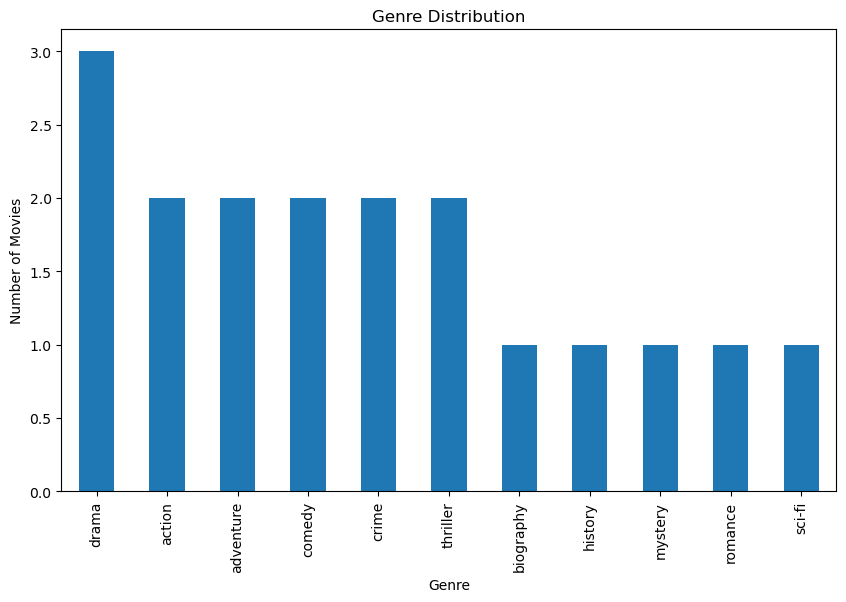

In [1]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

# Sample data
data = {
    "title": ["10 things i hate about you", "1492: conquest of paradise", "15 minutes", "2001: a space odyssey", "48 hrs."],
    "year": [1999, 1992, 2001, 1968, 1982],
    "ratingIMDB": [6.9, 6.2, 6.1, 8.4, 6.9],
    "votes": [62847, 10421, 25854, 163227, 22289],
    "genresIMDB": ["['comedy' 'romance']", "['adventure' 'biography' 'drama' 'history']", "['action' 'crime' 'drama' 'thriller']", "['adventure' 'mystery' 'sci-fi']", "['action' 'comedy' 'crime' 'drama' 'thriller']"]
}

df = pd.DataFrame(data, index=['m0', 'm1', 'm2', 'm3', 'm4'])

# Function to clean and split genres
def clean_split_genres(genres_str):
    return genres_str.strip("[]").replace("'", "").split()

# Apply the function to the genresIMDB column
df['genresIMDB'] = df['genresIMDB'].apply(clean_split_genres)

# Use MultiLabelBinarizer to create binary matrix
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['genresIMDB'])

# Create a new DataFrame with binary values
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=df.index)

# Sum the values for each genre to get the distribution
genre_distribution = genre_df.sum().sort_values(ascending=False)

# Plot the genre distribution
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()
